In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Reasearching European Social Survey Data

I want to practice testing how significant differences between the variables of different sample groups are. I will do this using data from the European Social Survey (ESS).  The data I have only contains years 2012 and 2014. 

Before I begin testing I must import the data.

In [2]:
ess = pd.read_csv('C:\\Code\\Data\\ess.csv')

In [3]:
ess.shape

(8594, 13)

In [4]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


The 'cntry' column refers to the respondant's country of origin.

The 'idno' column is the respondant's identification number.

The 'year' column tells the ESS round the data was from. Here there is only data from rounds 6 and 7, done in 2012 and 2014 respectively.

The 'tvtot' column records respondant's answer to the question: "On an average weekday, how much time, in total, do you spend watching television?" Responds answered categorically, where 0 is no time at all, 1 is less than 0.5 hours, 2 is more than 0.5 hours to 1 hour, 3 is more than 1 hours to 1.5 hours, 4 is more than 1.5 hours to 2 hours, 5 is more than 2 hours to 2.5 hours, 6 is more than 2.5 hours to 3 hours, and finally 7 is more than 3 hours.

The 'ppltrst' column records answers to the question: "Using this card, generally speaking, would you say that most people can be trusted, or that you can't be too careful in dealing with people? Please tell me on a score of 0 to 10, where 0 means you can't be too careful and 10 means that most people can be trusted." Just as the question says, answers range from 0 to 10 where 0 means people are very untrustworthy and 10 means most be are trustworthy.

The 'pplfair' column records answers to the question: "Using this card, do you think that most people would try to take advantage of you if they got the chance, or would they try to be fair?" Here, answers ranged from 0 - 10, where 0 means most people try to take advantage of me and 10 means most people would trest me fairly.

The 'pplhlp' column records answers to the question: "Would you say that most of the time people try to be helpful or that they are mostly looking out for themselves?" Answers also ranged from 0 - 10, where 0 means most people only look out for themselves and 10 means most people try to be helpful.

The 'happy' column records answers to the question: "Taking all things together, how happy would you say you are?" Answers are 0 - 10, where 0 means the respondant is extremely unhappy and 10 means they are extremely happy.

The 'sclmeet' column records answers to the question: "Using this card, how often do you meet socially with friends, relatives or work colleagues?" In this question, answers range from 1 - 7, where 1 means they never meet socially, 2 means they meet socially less than once a month, 3 means they meet socially once a month, 4 means they meet socially several times a month, 5 means they meet socially once a week, 6 means they meet socially several times a week, and finally 7 means they meet socially every day.

The 'sclact' column records answers to the question: "Compared to other people of your age, how often would you say you take part in social activities?" In this question answers from 1 - 5, where 1 means respondants feel they meet socially much less than most people their age, 2 means respondants feel they meet socially less than most people their age, 3 means respondants feel they meet socially about the same people their age, 4 means respondants feel they meet socially more than most people their age, and 5 means respondants feel they meet socially much more than most people their age.

The 'gndr' column is simply the respondants gender, where 1 is male and 2 is female.

The 'agea' column is the age of respondants, calculated based on their recorded birthdays.

The 'partner' column records whether or not the respondant lives with a partner, where 1 means they do live with a partner and 2 means they do not.

In [5]:
# check which countries are represented
ess.cntry.value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

This data only appears to contain respondants from Spain (ES), Sweden (SE), Switzerland (NH), Norway (NO), the 	
Czech Republic (CZ), and a little bit from Germany (DE).

## Is the data normal?

In order to decide which type of significance test to use, parametric or non-parametric, I must know if my variables are noramally distributed

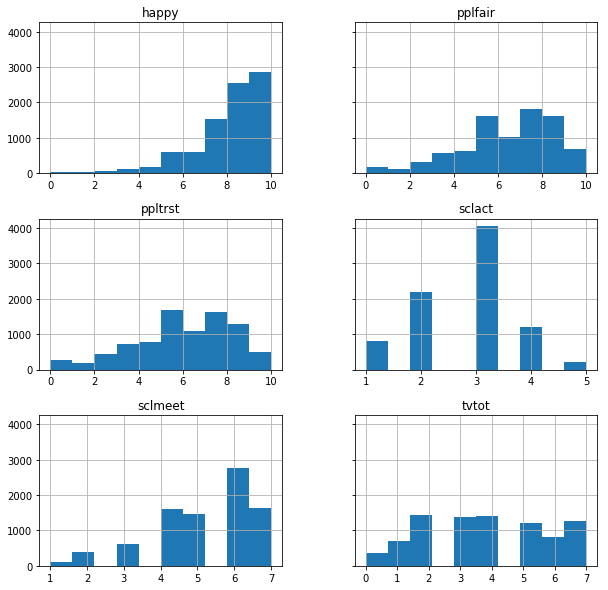

In [6]:
plt.figsize=(10,15)
ess[['tvtot','ppltrst','pplfair','happy','sclmeet','sclact']].hist(sharey=True, figsize=(10,10))
plt.show()

Most of these variables seems to be normally distributed, with the expception of 'happy', self-reported happiness, and 'sclmeet', self-reported frequency of social interaction.  

The trend here seems to be that when people report on their onw behavior, they respond more more positively, heavily skewing the results.

# Research Questions to Evaluate

For all of the following questions, I will use a significance level of .05.

In [7]:
ess_2012 = ess[ess['year']==6]

ess_2014 = ess[ess['year']==7]

print('There are {} datapoints from 2012 and {} datapoints from 2014'.format(len(ess_2012),len(ess_2014)))

There are 4297 datapoints from 2012 and 4297 datapoints from 2014


In [8]:
ess_2012 = ess_2012.sort_values(['idno','cntry']).reset_index(drop=True)
ess_2014 = ess_2014.sort_values(['idno','cntry']).reset_index(drop=True)

In [9]:
# Check if the same respondants answered in 2012 as 2014
list(ess_2012.idno) == list(ess_2014.idno)

True

In [10]:
ess_split = ess_2012.join(ess_2014, how='right',lsuffix='12',rsuffix='14') 

In [11]:
ess_split.shape

(4297, 26)

In [12]:
ess_split.head()

,cntry12,idno12,year12,tvtot12,ppltrst12,pplfair12,pplhlp12,happy12,sclmeet12,sclact12,...,tvtot14,ppltrst14,pplfair14,pplhlp14,happy14,sclmeet14,sclact14,gndr14,agea14,partner14
0,ES,1.0,6,7.0,3.0,3.0,3.0,9.0,7.0,3.0,...,2.0,6.0,6.0,3.0,7.0,7.0,3.0,2.0,34.0,2.0
1,ES,3.0,6,6.0,7.0,6.0,6.0,7.0,5.0,2.0,...,2.0,6.0,6.0,8.0,9.0,2.0,2.0,1.0,59.0,1.0
2,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,...,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
3,ES,5.0,6,4.0,5.0,7.0,5.0,10.0,6.0,1.0,...,2.0,7.0,7.0,6.0,8.0,7.0,3.0,1.0,46.0,1.0
4,ES,6.0,6,5.0,6.0,5.0,6.0,8.0,4.0,2.0,...,5.0,10.0,10.0,6.0,5.0,7.0,3.0,2.0,67.0,1.0


In [13]:
ess_split_clean = ess_split.dropna()

In [14]:
# create ess date frames for each country
ess_split_sp = ess_split_clean[ess_split_clean['cntry12']=='ES']
ess_split_se = ess_split_clean[ess_split_clean['cntry12']=='SE']
ess_split_sz = ess_split_clean[ess_split_clean['cntry12']=='CH']
ess_split_no = ess_split_clean[ess_split_clean['cntry12']=='NO']
ess_split_cz = ess_split_clean[ess_split_clean['cntry12']=='CZ']
ess_split_gr = ess_split_clean[ess_split_clean['cntry12']=='DE']

## Did people become more or less trusting from 2012 to 2014?

Null hypothesis: people reported similar levels of trust in 2012 and 2014

Alternate hypothesis: people have reported different level of trusting from 2012 to 2014 (2 tailed test)

I was use a related t-test to evaluate my research question as I am comparing the differences in 2 repsonses from the same people and this statistic is normaly distributed

### All Countries

In [15]:
diff = ess_split_clean['ppltrst14'].mean() - ess_split_clean['ppltrst12'].mean()

print('Reported trustworthiness of others in all others increased by ',diff)

Reported trustworthiness of others in all others increased by  -0.011606912561259008


In [16]:
stat, pvalue = stats.ttest_rel(ess_split_clean['ppltrst12'], ess_split_clean['ppltrst14'])

print('Test Statistic: ',stat)
print('P-Value: ',pvalue)

Test Statistic:  0.24147721605831796
P-Value:  0.8091980464994594


For all countries, there was a only around a 0.012 difference between how people rated the trustworthiness of others in 2012 and 2014. However, the is and 81% likelihood that this difference is due to chance. I must accept my null hypothesis and state that my data does not significantly show that there is a difference between how people is all represented countries rated the trustworthiness of others.

Even though there doesn't appear to be a significant difference amoung all countries, I want to see if there is a difference amoung individual ones.

### Split Countries

In [17]:
diff = ess_split_sp['ppltrst14'].mean() - ess_split_sp['ppltrst12'].mean()
stat, pvalue = stats.ttest_rel(ess_split_sp['ppltrst12'], ess_split_sp['ppltrst14'])

print('Reported happines in Spain increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue)

Reported happines in Spain increased by  -0.1806451612903226

Test Statistic:  1.9559116540026058
P-Value:  0.05073211908451536


There is a 5.1% chance that the difference in Spanish happiness is due to chance. Even though it is very close to my significance level, I will accept the null hypothesis for Spain.

In [18]:
diff = ess_split_se['ppltrst14'].mean() - ess_split_se['ppltrst12'].mean()
stat, pvalue = stats.ttest_rel(ess_split_se['ppltrst12'], ess_split_se['ppltrst14'])

print('Reported happines in Sweden increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue)

Reported happines in Sweden increased by  0.22370012091898417

Test Statistic:  -2.2355951258512787
P-Value:  0.025644768355433317


People is Sweden rated the trustworthiness of others 0.22 points higher in 2014 than in 2012. Also, there is only a 2.6% chance that the difference is due to random chance. Because of this, I will reject the null hypothesis in this case, and say that my data shows a significant difference between how the people of Sweden rated the trustworthiness of others in 2014 than in 2012.

In [19]:
diff = ess_split_sz['ppltrst14'].mean() - ess_split_sz['ppltrst12'].mean()
stat, pvalue = stats.ttest_rel(ess_split_sz['ppltrst12'], ess_split_sz['ppltrst14'])

print('Reported happines in Switzerland increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue)

Reported happines in Switzerland increased by  0.032531824611032434

Test Statistic:  -0.28086950742787586
P-Value:  0.7788927785846359


There is a 77.9% chance that the difference in Swiss happiness is due to chance. I accept the null hypothesis for Switzerland.

In [20]:
diff = ess_split_no['ppltrst14'].mean() - ess_split_no['ppltrst12'].mean()
stat, pvalue = stats.ttest_rel(ess_split_no['ppltrst12'], ess_split_no['ppltrst14'])

print('Reported happines in Norway increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue)

Reported happines in Norway increased by  -0.06240928882438368

Test Statistic:  0.6360118283525069
P-Value:  0.5249802228584514


There is a 77.9% chance that the difference in Norweigen happiness is due to chance. I accept the null hypothesis for Norway.

In [21]:
diff = ess_split_cz['ppltrst14'].mean() - ess_split_cz['ppltrst12'].mean()
stat, pvalue = stats.ttest_rel(ess_split_cz['ppltrst12'], ess_split_cz['ppltrst14'])

print('Reported happines in the Czech Republic increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue)

Reported happines in the Czech Republic increased by  -0.028776978417266896

Test Statistic:  0.19988973090128148
P-Value:  0.8416400394902406


There is a 84.1% chance that the difference in Czech happiness is due to chance. I accept the null hypothesis for the Czech Republic.

In [22]:
diff = ess_split_gr['ppltrst14'].mean() - ess_split_gr['ppltrst12'].mean()
stat, pvalue = stats.ttest_rel(ess_split_gr['ppltrst12'], ess_split_gr['ppltrst14'])

print('Reported happines in Germany increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue)

Reported happines in Germany increased by  0.1538461538461542

Test Statistic:  -0.1834682235710276
P-Value:  0.8574941662585133


The sample size is too small in Gemany to accurately reflect the population, but I still tested German responses anyway as a thought exercise.

There is a 85.7% chance that the difference in German happiness is due to chance. I accept the null hypothesis.

## Did people become happier from 2012 to 2014?

Null hypothesis: Reported happiness did not change from 2012 to 2014 for a particular country

Alternative hypothesis: Reported happiness did increased from 2012 to 2014 for a particular country (one-tailed)

I will use the Wilcoxon signed-rank test as I am comparing people's repsonses to themselves, and my data is not normally distributed.

### All Countries

In [23]:
diff = ess_split_clean['happy14'].mean() - ess_split_clean['happy12'].mean()

print('Reported happines in all countries increased by ',diff)

Reported happines in all countries increased by  -0.04565385607428407


In [24]:
stat, pvalue = stats.wilcoxon(ess_split_clean['happy12'], ess_split_clean['happy14'], zero_method='wilcox')

print('Test Statistic: ',stat)
print('P-Value: ',pvalue/2)

Test Statistic:  2400525.5
P-Value:  0.050900168265913426


There is a 5.1% chance that any difference in happiness level is due to chance. Though it is close, based on my chosen significance value of 5%, I must accept the null hypothesis and conlcude that the data does not support the conclusion that all of the represented countries became happier in 2012.

However, this result is close, that I would like to examine each country represented and see the results.

### Split Countries

In [25]:
diff = ess_split_sp['happy14'].mean() - ess_split_sp['happy12'].mean()
stat, pvalue = stats.wilcoxon(ess_split_sp['happy12'], ess_split_sp['happy14'], zero_method='wilcox')

print('Reported happines in Spain increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue/2)

Reported happines in Spain increased by  -0.09493087557603719

Test Statistic:  190064.5
P-Value:  0.07869966363518655


There is a 7.9% chance that the difference in Spanish happiness is due to chance. I accept the null hypothesis for Spain.

In [26]:
diff = ess_split_se['happy14'].mean() - ess_split_se['happy12'].mean()
stat, pvalue = stats.wilcoxon(ess_split_se['happy12'], ess_split_se['happy14'], zero_method='wilcox')

print('Reported happines in Sweden increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue/2)

Reported happines in Sweden increased by  0.045949214026602014

Test Statistic:  103562.0
P-Value:  0.2947970614920907


There is a 29.5% chance that the difference in Swedish happiness is due to chance. I accept the null hypothesis for Sweden.

In [27]:
diff = ess_split_sz['happy14'].mean() - ess_split_sz['happy12'].mean()
stat, pvalue = stats.wilcoxon(ess_split_sz['happy12'], ess_split_sz['happy14'], zero_method='wilcox')

print('Reported happines in Switzerland increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue/2)

Reported happines in Switzerland increased by  0.048090523338046864

Test Statistic:  75726.5
P-Value:  0.37878037178198376


There is a 37.9% chance that the difference in Swiss happiness is due to chance. I accept the null hypothesis for Switzerland.

In [28]:
diff = ess_split_no['happy14'].mean() - ess_split_no['happy12'].mean()
stat, pvalue = stats.wilcoxon(ess_split_no['happy12'], ess_split_no['happy14'], zero_method='wilcox')

print('Reported happines in Norway increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue/2)

Reported happines in Norway increased by  -0.3483309143686508

Test Statistic:  60547.0
P-Value:  7.153458926322886e-06


There is a 0.0000007% chance that the difference in Norweigen happiness is due to chance. I reject the null hypothesis. However, Norweigen happiness decreased from 2012 to 2014 so my data does not validate my alternative hypothesis either.  The data suggest that reported Norweigen happiness decreased from 2012 to 2014.

In [29]:
diff = ess_split_cz['happy14'].mean() - ess_split_cz['happy12'].mean()
stat, pvalue = stats.wilcoxon(ess_split_cz['happy12'], ess_split_cz['happy14'], zero_method='wilcox')

print('Reported happines in the Czech Republic increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue/2)

Reported happines in the Czech Republic increased by  0.15467625899280613

Test Statistic:  55932.0
P-Value:  0.11424822061829898


There is a 11.4% chance that the difference in Czech happiness is due to chance. I accept the null hypothesis for the Czech Republic.

In [30]:
diff = ess_split_gr['happy14'].mean() - ess_split_gr['happy12'].mean()
stat, pvalue = stats.wilcoxon(ess_split_gr['happy12'], ess_split_gr['happy14'], zero_method='wilcox')

print('Reported happines in Germany increased by ',diff)
print('\nTest Statistic: ',stat)
print('P-Value: ',pvalue/2)

Reported happines in Germany increased by  0.6153846153846159

Test Statistic:  16.0
P-Value:  0.11825096574035865


The sample size is too small in Gemany to accurately reflect the population, but I still tested German responses anyway as a thought exercise.

There is a 11.9% chance that the difference in German happiness is due to chance. I accept the null hypothesis.

## Who reported watching more TV in 2012, men or women?

Null hypothesis: Men and women reported watching similar amounts of T.V.

Alternative hypothesis: Men and women reported watching different amounts of T.V. (2-tailed)

Alternative1: Men reported watching more T.V. than women (1-tailed)

Alternative2: Women reported watching more T.V. tan men (1-tailed)

I will use an independent t-test to determine the p-value of my research question as the 2 groups I am comparing, men and woman, are completely independent and have no overlap. Also, this variable has been observed to be normally distributed.

In [31]:
ess_split_men = ess_split_clean[ess_split_clean['gndr12']==1]
ess_split_women = ess_split_clean[ess_split_clean['gndr12']==2]

In [32]:
diff = ess_split_men['tvtot12'].mean() - ess_split_women['tvtot12'].mean()

print('How much extra time women watch tv: ',-diff)

stat, pvalue = stats.ttest_ind(ess_split_men['tvtot12'],ess_split_women['tvtot12'])

print('\nTest Statistic: ',stat)
print('2-Tailed P-Value: ',pvalue)

How much extra time women watch tv:  0.030927396068140656

Test Statistic:  -0.4785686174824559
2-Tailed P-Value:  0.6322725485529518


Women have a greater tv time smaple mean than men, but with a p-value of 63.2%, I do not consider this a meaningful difference.  I accept the null hypothesis, and conclude that this data does not suggest that men and women watch tv for different amounts of time.

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Null hypothesis: People living with a partner and living alone believe humans to be equally as fair

Alternative hypothesis: People living with a partner and lving alone do not believe humans to be equally as fair (2-tailed)

Alternative1: People living with a partner believe humans to be more fair than those living alone (1-tailed)

Alternative2: People lving alone believe humans to be more fair than those living with a partner (1-tailed)

I will use an independent t-test to determine the p-value of my research question as the 2 groups I am comparing, people living with a partner and people living without one, are completely independent and have no overlap. Also, this variable has been observed to be normally distributed.

In [33]:
ess_split_parter = ess_split_clean[ess_split_clean['partner12']==1]
ess_split_alone = ess_split_clean[ess_split_clean['partner12']==2]

In [34]:
diff = ess_split_parter['tvtot12'].mean() - ess_split_alone['tvtot12'].mean()

print('How much more fair those will live with partners rated humanity : ',diff)

stat, pvalue = stats.ttest_ind(ess_split_parter['tvtot12'],ess_split_alone['tvtot12'])

print('\nTest Statistic: ',stat)
print('2-Tailed P-Value: ',pvalue)

How much more fair those will live with partners rated humanity :  0.08102628504838094

Test Statistic:  1.2163830409525376
2-Tailed P-Value:  0.22391312783870718


Those who live with partners had a slightly higher sample rating for fairness than those who live alone. However, there is only a 22.4% chance that these results are due to chance. Therefore, I must conclude that this data does not support that there is a significant difference between how those in the represented European countries rate the fairness of humanity.

## Are there any differences in how often people met socially in 2014 between Spain, Sweden, and Switzerland. Are there differences, and if so, which countries stand out?

Null hypothesis: Spain, Sweden, and Switzerland have no difference in how people self-reported their social habits

Alternative hypothesis: There is a difference in how people from Spain, Sweden, and Switzerland self-reported their social habits (2-tailed)

I will use the Kruskal-Wallis test because I have multiple independent groups to test between and the variable I am testing is not normally distributed.

In [35]:
stat, pvalue = stats.kruskal(ess_split_sp['sclmeet14'], ess_split_se['sclmeet14'], ess_split_sz['sclmeet14'])

print('Test Statistic: ',stat)
print('P-value :',pvalue)

Test Statistic:  22.65117057283597
P-value : 1.2060374833606758e-05


There is defintely a significant difference between the countries I chose to compare: Spain, Sweden, and Switzerland. There is a 0.00001% chance that whatever difference exists between the groups is due to chance. I will reject the null hypothesis as the data definitely implies that there is a significant difference between how people from Spain, Sweden, an Switzerland self-report how often they meet socially.

However, this does not tell me with the difference are or if every group is significantly different. To learn that, I will have to look at the diffences between each group individually.

### Evaluting Each Country Pair

In [36]:
diff1 = ess_split_sp['sclmeet14'].mean() - ess_split_se['sclmeet14'].mean()
diff2 = ess_split_sp['sclmeet14'].mean() - ess_split_sz['sclmeet14'].mean()
diff3 = ess_split_se['sclmeet14'].mean() - ess_split_sz['sclmeet14'].mean()

s1,p1 = stats.kruskal(ess_split_sp['sclmeet14'], ess_split_se['sclmeet14'])
s2,p2 = stats.kruskal(ess_split_sp['sclmeet14'], ess_split_sz['sclmeet14'])
s3,p3 = stats.kruskal(ess_split_se['sclmeet14'], ess_split_sz['sclmeet14'])

print('Difference Between Spain and Sweden :',diff1)
print('Significance of the Differnce :',p1)
print('\nDifference Between Spain and Switzerland :',diff2)
print('Significance of the Differnce :',p2)
print('\nDifference Between Sweden and Switzerland :',diff3)
print('Significance of the Differnce :',p3)

Difference Between Spain and Sweden : -0.17487671278676498
Significance of the Differnce : 0.0065190173376389665

Difference Between Spain and Switzerland : 0.11248802299584781
Significance of the Differnce : 0.018801984822578496

Difference Between Sweden and Switzerland : 0.2873647357826128
Significance of the Differnce : 1.5219464141532867e-06


Sweden tends to rate their social interaction 0.17 more than Spain.  This result is significant as it is only 0.7% likelihood that this result is due to chance.

Spain tends to rate their social interaction 0.11 more than Switzerland.  This result is significant as it is only 1.9% likelihood that this result is due to chance.

Sweden tends to rate their social interaction 0.29 more than Switzerland.  This result is significant as it is only 0.000002% likelihood that this result is due to chance.

So it seems that all the groups have a significant difference between each of their ratings, with the difference between Sweden and Switzerland being the largest and most significant. The average self-reported social interaction rating ranked by country is Sweden, Spain, and then Sweden.

## Are there any difference in how often people took part in social activities, relative to others their age, in 2014 between Spain, Sweden, Switzerland. Are there differences, and if so, which countries stand out?

Null hypothesis: There is no difference between the how people from Spain, Sweden, and Switzerland rate how often they partake in social activity compared to people their own age. 

Alternative hypothesis: There is a difference between the how people from Spain, Sweden, and Switzerland rate how often they partake in social activity compared to people their own age. (2-tailed)

I will use one-way ANOVA to test how significant the difference between the rating of Spain, Sweden, and Switzerland are.

In [37]:
stat,pvalue = stats.f_oneway(ess_split_sp['sclact14'], ess_split_se['sclact14'], ess_split_sz['sclact14'])

print('Test Statistic: ',stat)
print('P-value :',pvalue)

Test Statistic:  16.72517155261155
P-value : 6.058954470003814e-08


### Evaluting Each Country Pair

In [38]:
diff1 = ess_split_sp['sclact14'].mean() - ess_split_se['sclact14'].mean()
diff2 = ess_split_sp['sclact14'].mean() - ess_split_sz['sclact14'].mean()
diff3 = ess_split_se['sclact14'].mean() - ess_split_sz['sclact14'].mean()

s1,p1 = stats.ttest_ind(ess_split_sp['sclact14'], ess_split_se['sclact14'])
s2,p2 = stats.ttest_ind(ess_split_sp['sclact14'], ess_split_sz['sclact14'])
s3,p3 = stats.ttest_ind(ess_split_se['sclact14'], ess_split_sz['sclact14'])

print('Difference Between Spain and Sweden :',diff1)
print('Significance of the Differnce :',p1)
print('\nDifference Between Spain and Switzerland :',diff2)
print('Significance of the Differnce :',p2)
print('\nDifference Between Sweden and Switzerland :',diff3)
print('Significance of the Differnce :',p3)

Difference Between Spain and Sweden : -0.23829955588741702
Significance of the Differnce : 1.9141863083806783e-08

Difference Between Spain and Switzerland : -0.15047679883195686
Significance of the Differnce : 0.0008905073907619924

Difference Between Sweden and Switzerland : 0.08782275705546017
Significance of the Differnce : 0.051481866721538705


The average Swedish rating of comparative social activity is 0.29 more than the average Spanish rating. It is significant as it has only a 0.00000002% chance that this result is due to chance. 

The average Swiss rating of comparative social activity is 0.15 more than the average Spanish rating. It is significant as it has only a 0.0009% chance that this result is due to chance. 

The average Swedish rating of comparative social activity is 0.09 more than the average Swiss rating. Though, it does not appear to be significant as it has only a 0.051% chance that this result is due to chance. Though it is very close, it is slightly above the significance threshold that I set at the begining of this project.

After testing, it seems the average Swedish and Swiss ratings are greater than the average Spanish rating of social interaction. Even though the Swedish sample mean is greater than the Swiss sample mean, I cannot confidently say that my data shows that the average Swedish person rates there social interaction to be greater than others their age than the average Swiss person.